## PCA 10 most Important Features and Cluster Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cd ..

/home/jovyan/Ames


In [3]:
run src/load_data.py

In [4]:
#!pip install tqdm

In [5]:
import lib.visuals as vs

In [6]:
from sklearn.decomposition import PCA

In [7]:
housing_df = pd.get_dummies(housing_df)
housing_df = housing_df.sample(frac=1)

In [8]:
housing_df = housing_df[['YearBuilt','TotalBsmtSF','FirstFlrSF','GrLivArea','GarageArea', 'ExterQual_TA','BsmtQual_Ex','FullBath_1', 'KitchenQual_TA','GarageCars_3']]

In [9]:
housing_df

YearBuilt  TotalBsmtSF  FirstFlrSF  GrLivArea  GarageArea  ExterQual_TA  \
Id                                                                              
272        1954         1385        1363       1363         439             1   
106        2003         1053        1053       1992         648             0   
1041       1957         1134        1803       1803         484             1   
30         1927          520         520        520         240             1   
936        1926          600         747        747         528             1   
1372       1955          992        1661       1661         377             1   
432        1920          901        1088       1198           0             1   
947        1959         1144        1144       1144         796             1   
99         1920          458         835        835         366             1   
878        2004         1462        1462       2224         738             0   
130        1958         1008        1053       1053         750             1   
251        1940          728        1306       1306           0             1   
557        1957         1092        1092       1092         299             1   
972        2003          764         764       1626         474             0   
616        1963          936        1054       1054         480             1   
1209       1962          931        1283       1283         506             1   
1223       1949         1040        1168       1846         315             1   
1321       1957         1478        1478       1478         442             1   
761        1959          864         864        864         300             1   
922        1900         1272        1272       2200           0             1   
877        1963         1064        1040       1040         648             1   
694        1921         1073        1073       1073         326             1   
79         1968         1768        1768       1768           0             1   
531        1988         1461        1509       1509         600             0   
813        1952          540        1044       1044         504             0   
520        1926         1276        1276       2080         282             0   
197        2007         1726        1726       1726         786             0   
449        1937          780         780       1376         198             1   
596        2005         1814        1826       1826         758             0   
438        1926          884         904        904         180             0   
...         ...          ...         ...        ...         ...           ...   
584        1893         1237        1521       2775         880             0   
40         1955            0        1152       1152           0             1   
1084       1964         1251        1251       1251         461             1   
984        2002         1128        1149       2290         779             0   
806        2008         1417        1428       1428         554             0   
298        1997          975         975       1950         576             0   
456        1973         1242        1242       1242         528             1   
291        2006         1079        1079       1919         685             0   
668        1994         1408        1679       1679         575             1   
167        1955         1617        1867       1867         303             0   
127        1976         1078         958        958         440             1   
524        2007         3138        3138       4676         884             0   
1273       1965          935         935        935         288             1   
1252       2003         1405        1405       1405         478             0   
1214       1965          648         960        960         364             1   
1190       1999          994        1028       1804         442             1   
217        2004         1436        1

In [10]:
def apply_scale(dataframe, scaling_function):
    numerical_df = dataframe.select_dtypes(include=[float])
    print(numerical_df.columns)
    numerical_df = scaling_function(numerical_df)
    tmp_df = dataframe.copy()
    tmp_df[numerical_df.columns] = numerical_df
    return tmp_df

def gelman_scale(dataframe):
    return (dataframe - dataframe.mean())/(2*dataframe.std())

def standard_scale(dataframe):
    return (dataframe - dataframe.mean())/(dataframe.std())

df_gelman = apply_scale(housing_df, gelman_scale)
df_standard = apply_scale(housing_df, standard_scale)

Index([], dtype='object')
Index([], dtype='object')


In [11]:
pca_original = PCA()
pca_gelman = PCA()
pca_standard = PCA()
pca_original.fit(housing_df)
pca_gelman.fit(df_gelman)
pca_standard.fit(df_standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

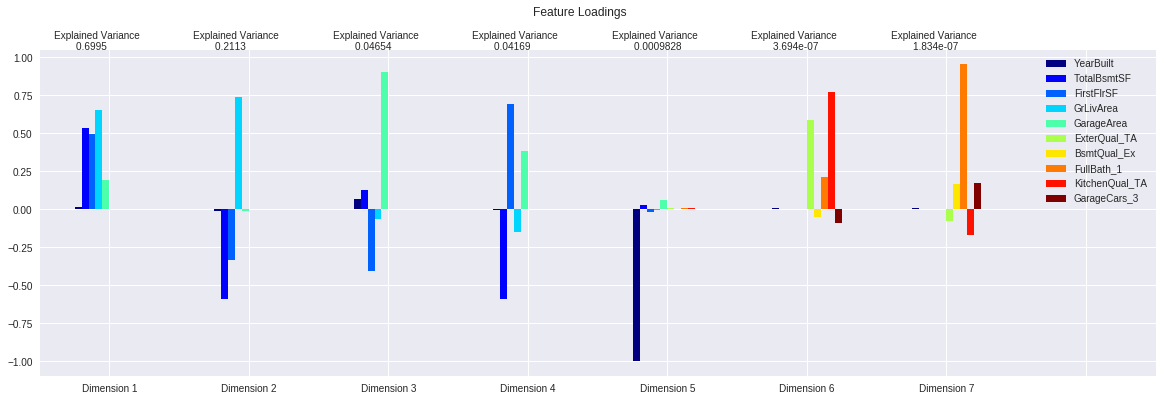

In [12]:
original_loading_plot = vs.FeatureLoadingsPlot(housing_df, pca_original,7)
original_loading_plot.display_segments()

Dimension 1 represents the size of the house - we are seeing the SF of the Total Basement as well as the General Living Area and the First Floor explain 70% of the variance. 

Dimension 2 can be interpreted as homes that have a larger general living area but no First Floor or Basement and explains 21% of the variance.

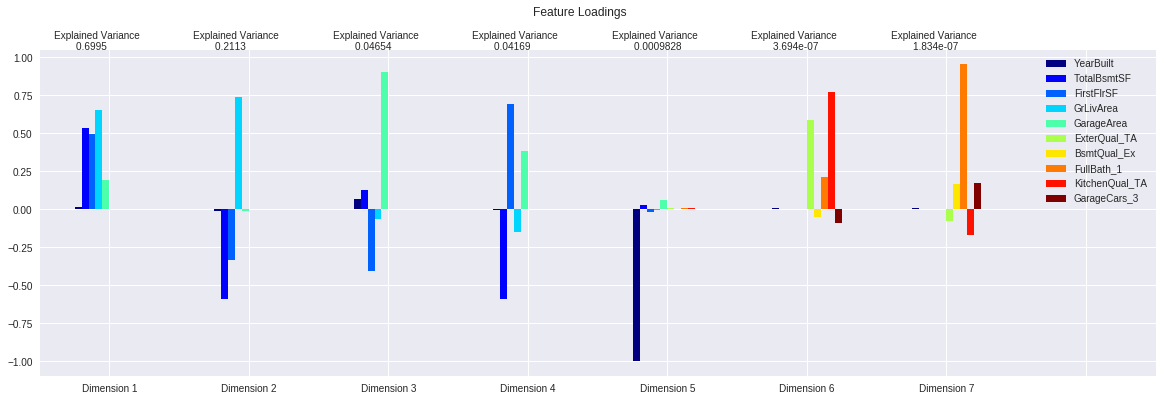

In [13]:
gelman_loading_plot = vs.FeatureLoadingsPlot(df_gelman, pca_gelman,7)
gelman_loading_plot.display_segments()

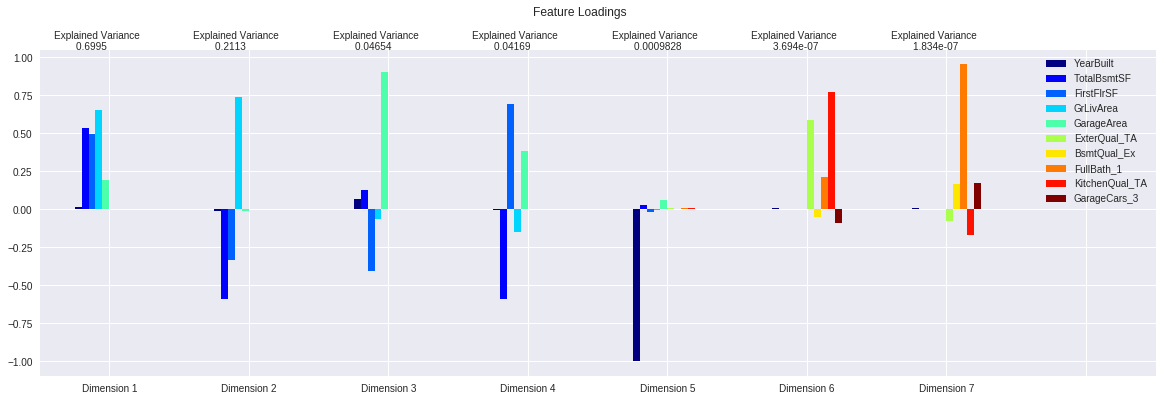

In [14]:
standard_loading_plot = vs.FeatureLoadingsPlot(df_standard, pca_standard,7)
standard_loading_plot.display_segments()

The scaled versions look very similar.

In [19]:
df_original_numerical = housing_df.select_dtypes([int, float])
df_gelman_numerical = df_gelman.select_dtypes([int, float])
df_standard_numerical = df_standard.select_dtypes([int, float])

In [20]:
pca_original_numerical = PCA()
pca_gelman_numerical = PCA()
pca_standard_numerical = PCA()

In [21]:
pca_original_numerical.fit(df_original_numerical)
pca_gelman_numerical.fit(df_gelman_numerical)
pca_standard_numerical.fit(df_standard_numerical)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
dims_5 = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5']
dims_10 = dims_5 + ['Dimension 6', 'Dimension 7' 'Dimentions 8', 'Dimension 9', 'Dimension 10', 'Dimension 11']

df_original_pca = pd.DataFrame(pca_original.transform(housing_df))
df_original_pca.columns = dims_10

df_original_numerical_pca = pd.DataFrame(pca_original_numerical.transform(df_original_numerical))
df_original_numerical_pca.columns = dims_5

df_gelman_pca = pd.DataFrame(pca_gelman.transform(df_gelman))
df_gelman_pca.columns = dims_10

df_gelman_numerical_pca = pd.DataFrame(pca_gelman_numerical.transform(df_gelman_numerical))
df_gelman_numerical_pca.columns = dims_5

df_standard_pca = pd.DataFrame(pca_standard.transform(df_standard))
df_standard_pca.columns = dims_10

df_standard_numerical_pca = pd.DataFrame(pca_standard_numerical.transform(df_standard_numerical))
df_standard_numerical_pca.columns = dims_5

In [38]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
df_gelman                    DataFrame          YearBuilt  TotalBsm<...>n[1451 rows x 10 columns]
df_gelman_numerical          DataFrame          YearBuilt  TotalBsm<...>\n[1451 rows x 5 columns]
df_gelman_numerical_pca      DataFrame          Dimension 1  Dimens<...>\n[1451 rows x 5 columns]
df_gelman_pca                DataFrame          Dimension 1  Dimens<...>n[1451 rows x 10 columns]
df_original_numerical        DataFrame          YearBuilt  TotalBsm<...>\n[1451 rows x 5 columns]
df_original_numerical_pca    DataFrame          Dimension 1  Dimens<...>\n[1451 rows x 5 columns]
df_original_pca              DataFrame          Dimension 1  Dimens<...>n[1451 rows x 10 columns]
df_standard                  DataFrame          YearBuilt  TotalBsm<...>n[1451 rows x 10 columns]
df_standard_numerical        DataFrame          YearBuilt  TotalBsm<...>\n[1451 rows x 5 columns]
df_standard_nu

 33%|███▎      | 1/3 [00:01<00:03,  1.88s/it]

For n_clusters = 2 the silhouette score is 0.4099540933715107.


 67%|██████▋   | 2/3 [00:05<00:02,  2.62s/it]

For n_clusters = 3 the silhouette score is 0.38302903906477864.


100%|██████████| 3/3 [00:08<00:00,  2.73s/it]

For n_clusters = 4 the silhouette score is 0.3692459477465184.


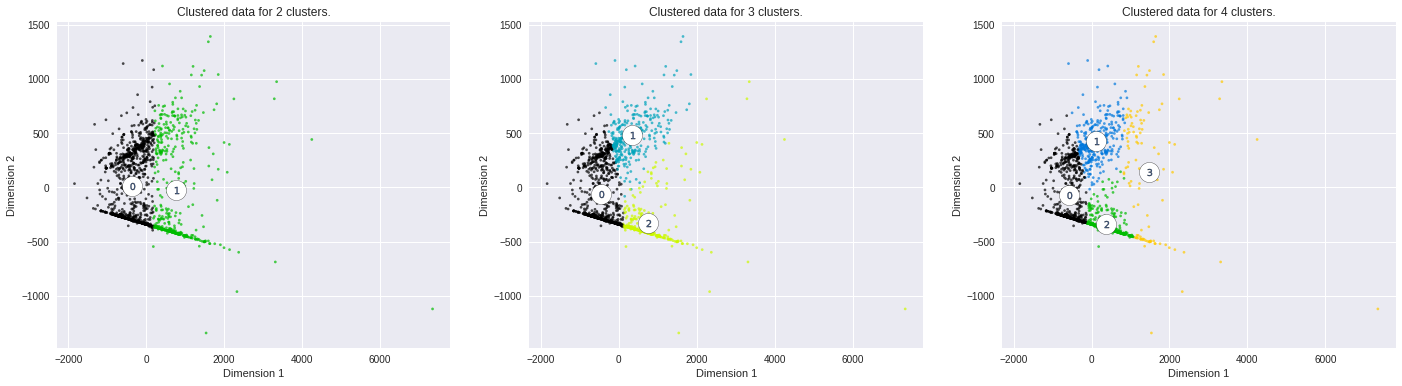

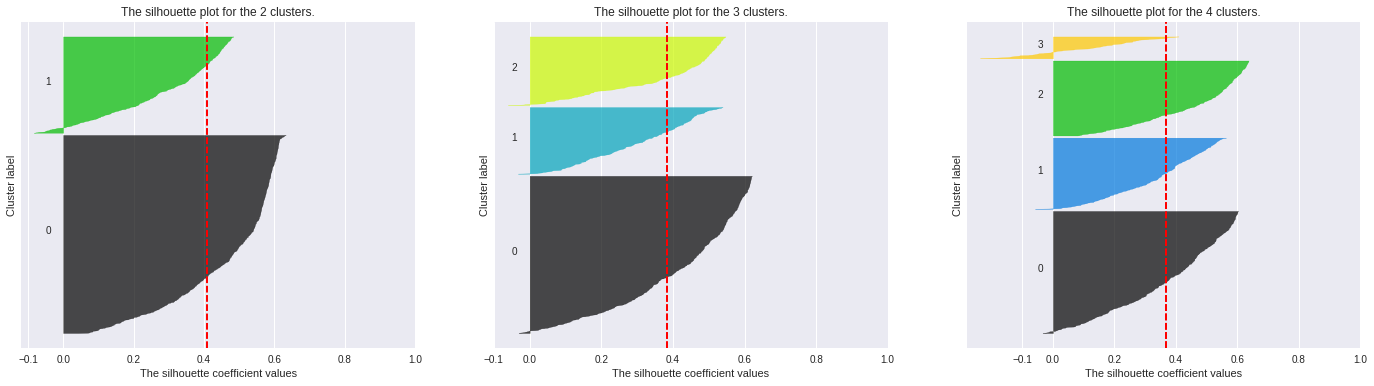

In [40]:
gelman_pca_clusters = vs.Clusters(df_gelman_pca, [2,3,4])
gelman_pca_clusters.cluster_plots()
gelman_pca_clusters.silhouette_plots()

 33%|███▎      | 1/3 [00:02<00:04,  2.01s/it]

For n_clusters = 2 the silhouette score is 0.4099540933715107.


 67%|██████▋   | 2/3 [00:05<00:02,  2.89s/it]

For n_clusters = 3 the silhouette score is 0.38302903906477864.


100%|██████████| 3/3 [00:08<00:00,  2.98s/it]

For n_clusters = 4 the silhouette score is 0.3692459477465184.


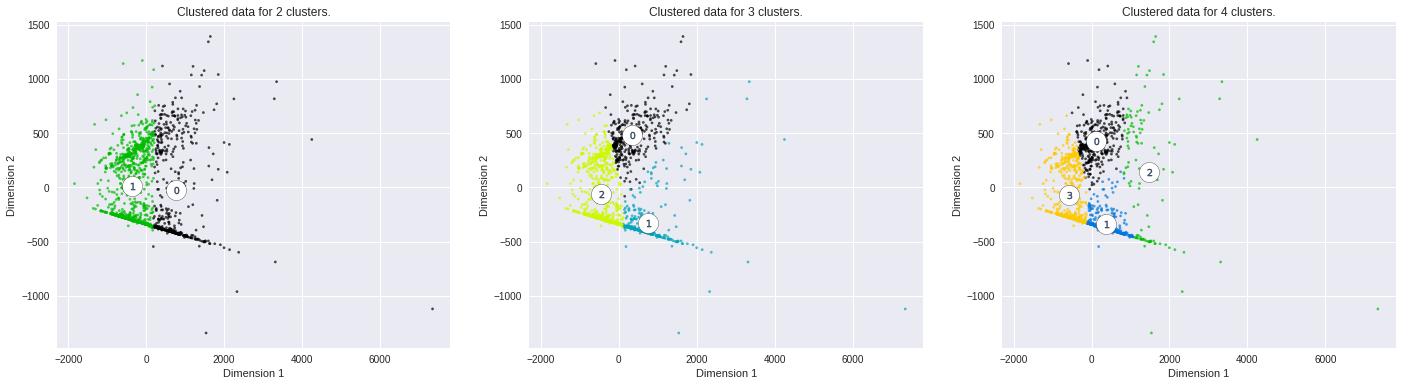

In [41]:
standard_pca_clusters = vs.Clusters(df_standard_pca, [2,3,4])
standard_pca_clusters.cluster_plots()

 33%|███▎      | 1/3 [00:01<00:03,  1.93s/it]

For n_clusters = 2 the silhouette score is 0.4099540933715107.


 67%|██████▋   | 2/3 [00:04<00:02,  2.36s/it]

For n_clusters = 3 the silhouette score is 0.38302903906477864.


100%|██████████| 3/3 [00:08<00:00,  2.70s/it]

For n_clusters = 4 the silhouette score is 0.3692459477465184.


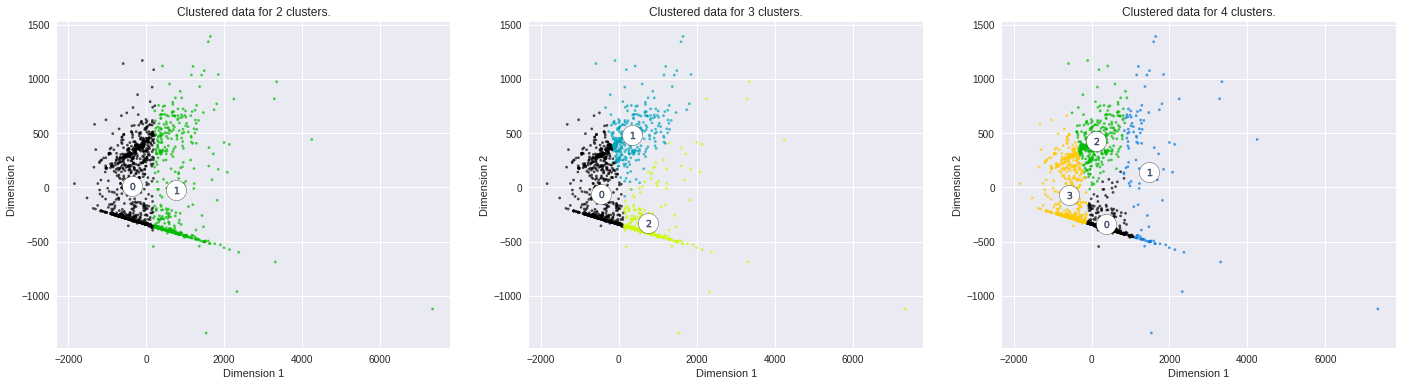

In [42]:
original_pca_clusters = vs.Clusters(df_original_pca, [2,3,4])
original_pca_clusters.cluster_plots()

 33%|███▎      | 1/3 [00:02<00:04,  2.05s/it]

For n_clusters = 2 the silhouette score is 0.4099547176820301.


 67%|██████▋   | 2/3 [00:05<00:02,  2.76s/it]

For n_clusters = 3 the silhouette score is 0.38302994586418515.


100%|██████████| 3/3 [00:08<00:00,  2.82s/it]

For n_clusters = 4 the silhouette score is 0.3692470161755997.


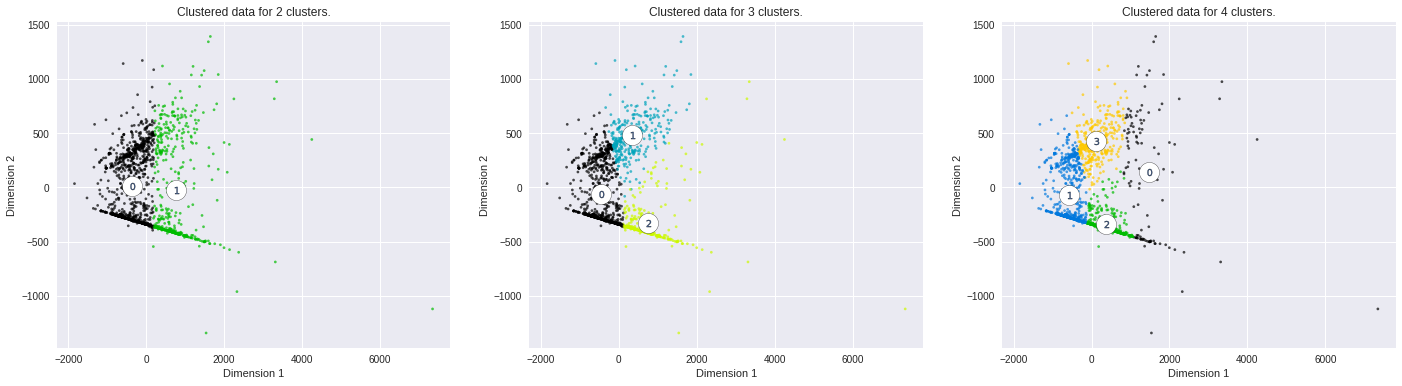

In [43]:
gelman_numerical_pca_clusters = vs.Clusters(df_gelman_numerical_pca, [2,3,4])
gelman_numerical_pca_clusters.cluster_plots()

 33%|███▎      | 1/3 [00:01<00:03,  1.77s/it]

For n_clusters = 2 the silhouette score is 0.4099547176820301.


 67%|██████▋   | 2/3 [00:05<00:02,  2.69s/it]

For n_clusters = 3 the silhouette score is 0.38273334279733845.


100%|██████████| 3/3 [00:08<00:00,  2.70s/it]

For n_clusters = 4 the silhouette score is 0.3692470161755997.


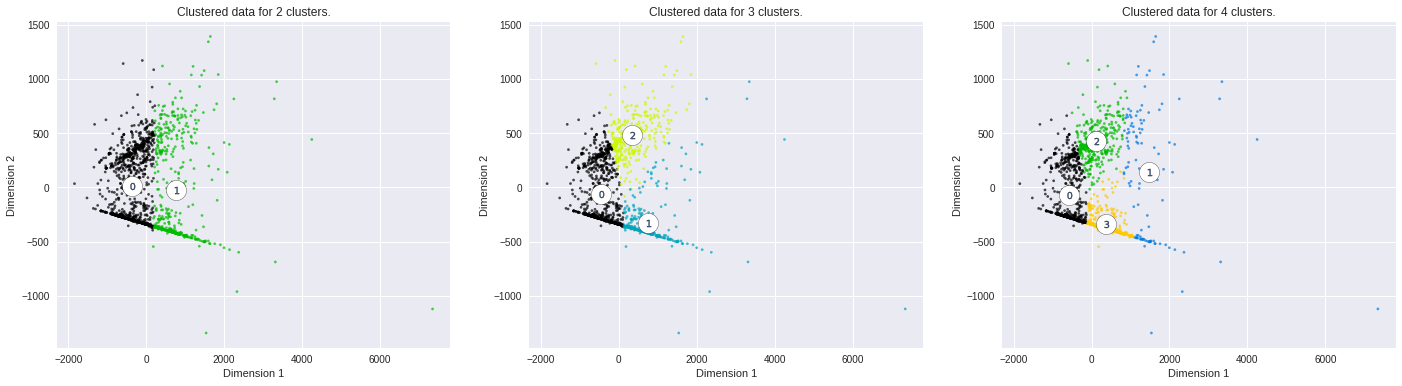

In [44]:
standard_numerical_pca_clusters = vs.Clusters(df_standard_numerical_pca, [2,3,4])
standard_numerical_pca_clusters.cluster_plots()

 33%|███▎      | 1/3 [00:01<00:03,  1.84s/it]

For n_clusters = 2 the silhouette score is 0.4099547176820301.


 67%|██████▋   | 2/3 [00:05<00:02,  2.56s/it]

For n_clusters = 3 the silhouette score is 0.38302994586418515.


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

For n_clusters = 4 the silhouette score is 0.3692470161755997.


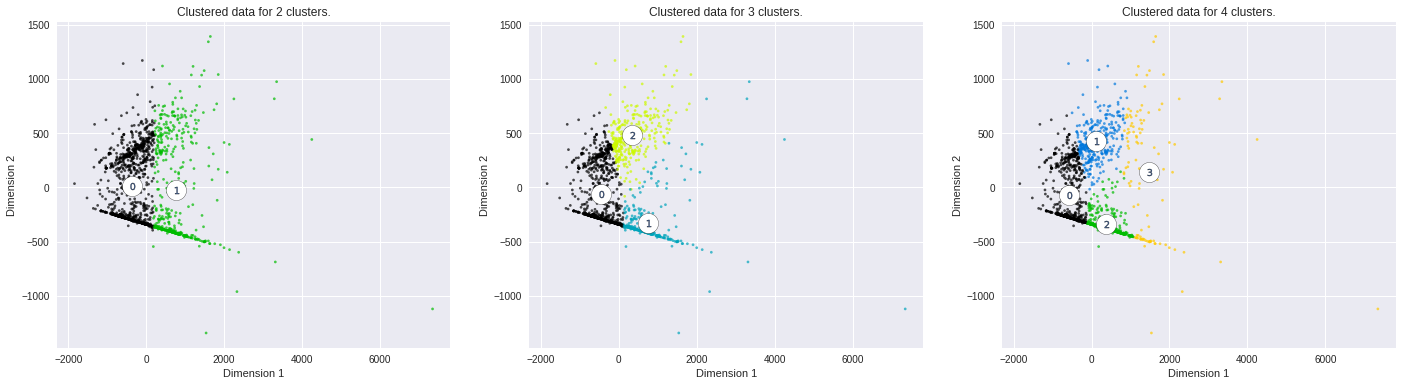

In [45]:
original_numerical_pca_clusters = vs.Clusters(df_original_numerical_pca, [2,3,4])
original_numerical_pca_clusters.cluster_plots()

According ot above silhouette scores it seems that there are a solid 2 clusters but the visualization of 3 or 4 clusters actually looks relevant as well.